In [1]:
# from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

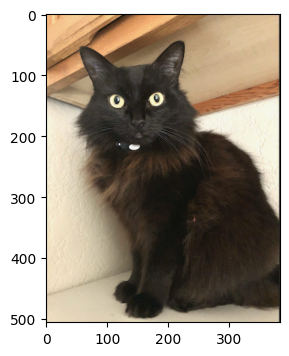

In [2]:
# load image
img = plt.imread('chia.png')
img2 = plt.imread('flames.png')
# create fig
plt.figure(figsize=(4,4))
plt.imshow(img)

In [3]:
alpha = img[:,:,3]
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]
# img[0] is a matrix of vertical pixels
# img[1] is a matrix of horizontal pixels


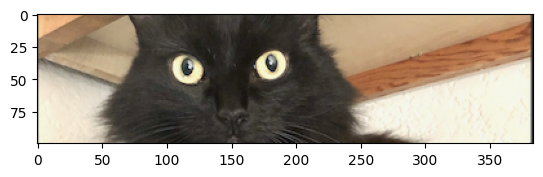

In [4]:
# show only a horiz slice of image
plt.imshow(img[100:200,:,:])

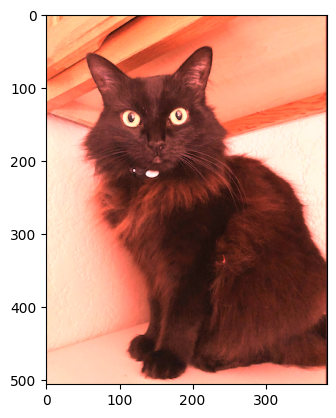

In [16]:
# modify R channel and place modified matrix back into img
# keeps all values between 0 and 1, multiplies them by factor
R_mod = np.clip(R * 2, 0, 1)
# creates matrix with rows: R, G, B
modified = np.stack((R_mod, G, B), axis=2)
plt.imshow(modified)

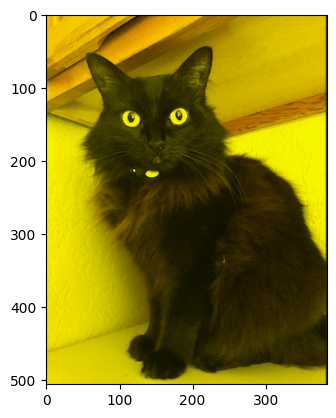

In [6]:
# remove the B channel
B_mod = np.clip(B * 0, 0, 1)
modified1 = np.stack((R, G, B_mod), axis=2)
plt.imshow(modified1)

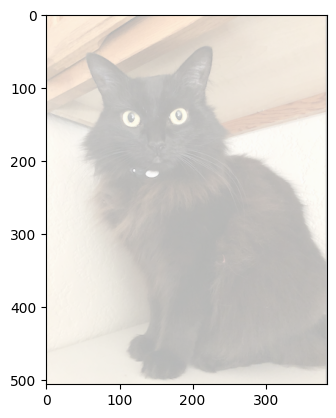

In [7]:
alpha_mod = np.clip(alpha * 0.3, 0, 1)
img_mod_alpha = img.copy()
img_mod_alpha[:,:,3] = alpha_mod
plt.imshow(img_mod_alpha)

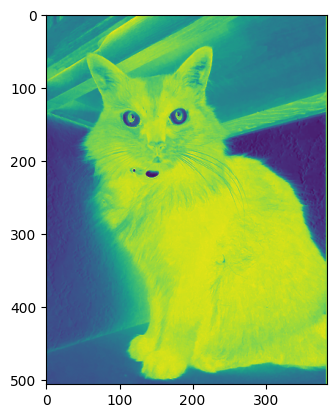

In [8]:
# normalize (cap to 1)
if img.max() > 1:
    img = img/255.0

# exclude the alpha channel to avoid transparent image
img_no_alpha = img[:, :, 2:3]
negative = 1 - img_no_alpha
plt.imshow(negative)
# plt.imshow(img)

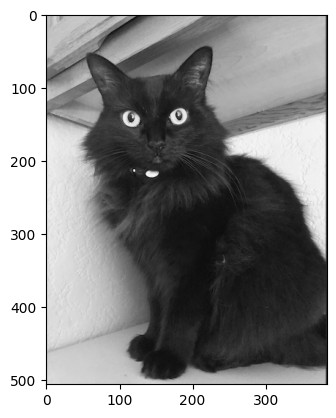

In [9]:
# grayscale = sum all rgb components
img_gray = img.sum(axis=-1)

plt.imshow(img_gray, cmap='gray')

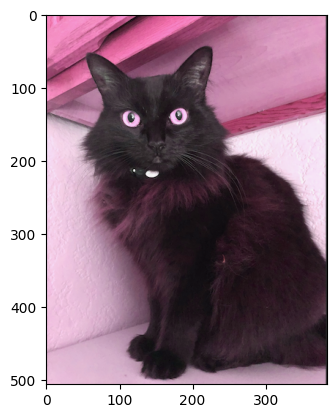

In [10]:
img_perm = img[:,:,(0,2,1)]
plt.imshow(img_perm)

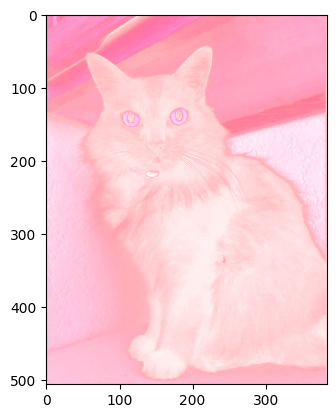

In [11]:
# flip image = axis=1 for horizontal
#  axis=0 for vertical
# axis=2 for color channels
img_flip = np.flip(img, axis=2)
plt.imshow(img_flip)

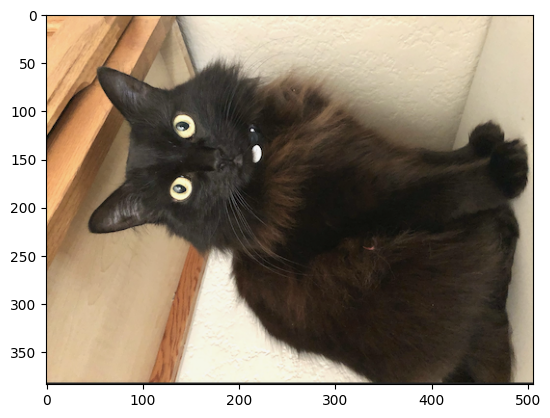

In [12]:
img_trans = np.transpose(img, axes=(1,0,2))
plt.imshow(img_trans)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..224.0].


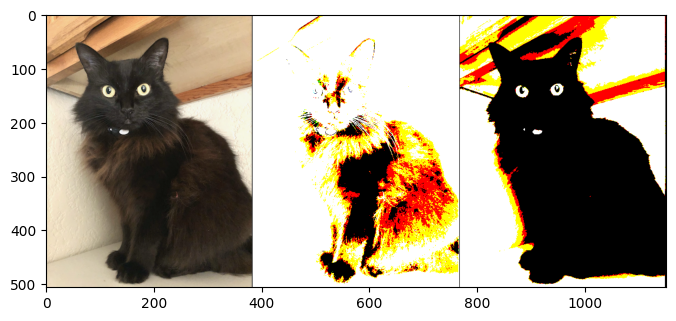

In [13]:
# Making Pixel values discrete by first division
#  // by which gives int and then multiply by the same factor 
unimg = img*255
img_0 = (unimg // 32) * 32
img_1 = (unimg // 128) * 128
img_all = np.concatenate((img, img_0, img_1), axis=1)
plt.figure(figsize=(8, 8))
plt.imshow(img_all)


first image, R:  [[0.15686275 0.9098039  0.9647059  ... 0.87058824 0.5019608  0.15686275]
 [0.15686275 0.9098039  0.9647059  ... 0.87058824 0.5058824  0.15686275]
 [0.15686275 0.9098039  0.9607843  ... 0.8745098  0.5137255  0.15686275]
 ...
 [0.15686275 0.8980392  0.9490196  ... 0.80784315 0.48235294 0.15686275]
 [0.15686275 0.89411765 0.94509804 ... 0.81960785 0.48235294 0.15686275]
 [0.15686275 0.89411765 0.94509804 ... 0.8352941  0.49019608 0.15686275]]
second image, R:  [[0.38039216 0.3882353  0.39215687 ... 0.06666667 0.05490196 0.04705882]
 [0.38039216 0.3882353  0.4        ... 0.05490196 0.05098039 0.03921569]
 [0.38039216 0.3882353  0.4        ... 0.04705882 0.03921569 0.03137255]
 ...
 [0.70980394 0.70980394 0.7137255  ... 0.3372549  0.34509805 0.34117648]
 [0.69411767 0.69803923 0.7137255  ... 0.3254902  0.3372549  0.3372549 ]
 [0.68235296 0.7019608  0.7254902  ... 0.3019608  0.31764707 0.3254902 ]]
blended image, R:  [[0.22392157 0.75333333 0.79294115 ... 0.62941176 0.367843

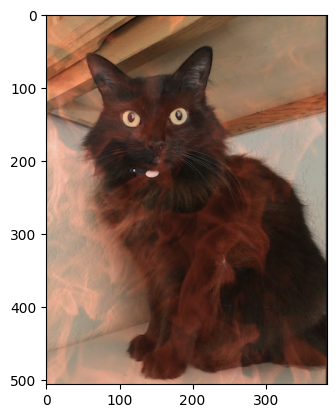

In [14]:
h = min(img.shape[0],img2.shape[0])
w = min(img.shape[1],img2.shape[1])
img = img[-h:,-w:,:]  # crop image from bottom-right
img2 = img2[-h:,-w:,:] # crop image from bottom-right

# the resultant matrix does exactly what we tell it to do
img_blend = (img * 0.7 + img2 * 0.3)
print("first image, R: ", img[:,:,0])
print("second image, R: ", img2[:,:,0])
print("blended image, R: ", img_blend[:,:,0])
# plt.figure(figsize=(4, 4))
plt.imshow(img_blend)

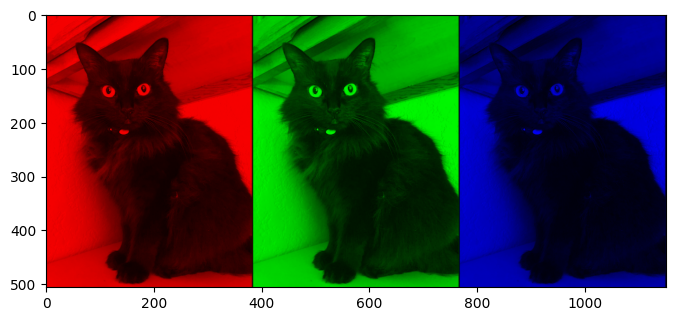

In [15]:
# a filter is essentially a dot product of the image matrix and the transpose of the filter matrix
sepia_filter = np.array([[0.393, 0.769, 0.189],
                         [0.349, 0.686, 0.168],
                         [0.272, 0.534, 0.131]])
# we only select the red channel, zero out the others, to avoid color contribution from the other channels.
red_filter = np.array([[1, 0, 0],
                       [0, 0, 0],
                       [0, 0, 0]])
green_filter = np.array([[0, 0, 0],
                       [0, 1, 0],
                       [0, 0, 0]])
blue_filter = np.array([[0, 0, 0],
                         [0, 0, 0],
                         [0, 0, 1]])
# magenta_filter = np.array([[1, 0, 0],
#                          [0, 0, 0],
#                          [0, 0, 1]])
# true grayscale
gray_const_matrix = np.array([[ 0.333, 0.333, 0.333],
                              [ 0.333, 0.333, 0.333],
                              [ 0.333, 0.333, 0.333]])

# "perceptual" grayscale-- weighted colors based on human eye
#  sensitivity to color
gray_matrix = np.array([[0.2989, 0.5870, 0.1140],
                        [0.2989, 0.5870, 0.1140],
                        [0.2989, 0.5870, 0.1140],])

def apply_filter(img, filter):
    img = img[:,:,:3]
    img = np.dot(img, filter.T)
    img = np.clip(img, 0, 1)
    return img

red_image = apply_filter(img, red_filter)
sepia_image = apply_filter(img, sepia_filter)
gray_const_image = apply_filter(img, gray_const_matrix)
gray_image = apply_filter(img, gray_matrix)

green_image = apply_filter(img, green_filter)
blue_image = apply_filter(img, blue_filter)
# magenta_image = apply_filter(img, magenta_filter)

img_all = np.concatenate((red_image, green_image, blue_image), axis=1)
plt.figure(figsize=(8, 8))
plt.imshow(img_all)
